# Contour plots and Contour Levels

Use the ``contour``-shape to draw contour-plots of regular (or irregular data)
or to indicate contour-levels on top of other plots.

(requires EOmaps >= v7.1)


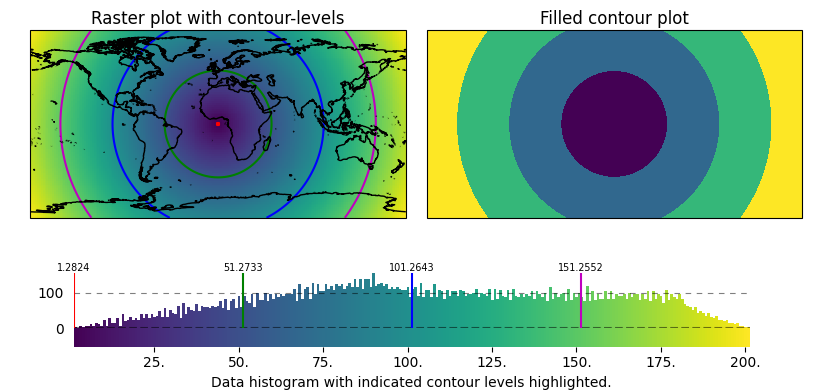

In [1]:
# EOmaps example:  Contour plots and contour levels

from eomaps import Maps
import numpy as np

# ------------- setup some random data
lon, lat = np.meshgrid(np.linspace(-180, 180, 200), np.linspace(-90, 90, 100))
data = np.sqrt(lon**2 + lat**2)
name = "some parameter"

# ------------- left map
m = Maps(ax=121)
m.add_title("Raster plot with contour-levels")
m.add_feature.preset.coastline()
# plot raster-data
m.set_data(data, lon, lat, parameter=name)
m.set_shape.raster()
m.plot_map()

# layer to indicate contour-levels
m_cont = m.new_layer(inherit_data=True)
m_cont.set_shape.contour(filled=False)
m_cont.set_classify.EqualInterval(k=4)
m_cont.plot_map(colors=("r", "g", "b", "m"))

# ------------- right map
m2 = m.new_map(ax=122, inherit_data=True)
m2.add_title("Filled contour plot")
m2.set_classify.EqualInterval(k=4)
m2.set_shape.contour(filled=True)
m2.plot_map(cmap="viridis")

# add a colorbar and indicate contour-levels
cb = m.add_colorbar(label="Data histogram with indicated contour levels highlighted.")
cb.indicate_contours(m_cont)

# apply a customized layout
layout = {
    "figsize": [8.34, 3.9],
    "0_map": [0.03652, 0.44167, 0.45, 0.48115],
    "1_map": [0.51152, 0.44167, 0.45, 0.48115],
    "2_cb": [-0.0125, 0.02673, 1.0125, 0.28055],
    "2_cb_histogram_size": 0.76,
}
m.apply_layout(layout)
m.show()